In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv(r"D:\SEM-5\ML-LAB\ex2\Rice_MSC_Ds.csv")
df.head()
df.shape

(75000, 107)

In [3]:
df['CLASS'].unique()

array(['Basmati', 'Arborio', 'Jasmine', 'Ipsala', 'Karacadag'],
      dtype=object)

In [4]:
df['CLASS'].value_counts()

CLASS
Basmati      15000
Arborio      15000
Jasmine      15000
Ipsala       15000
Karacadag    15000
Name: count, dtype: int64

In [5]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       ...
       'ALLdaub4L', 'ALLdaub4a', 'ALLdaub4b', 'ALLdaub4Y', 'ALLdaub4Cb',
       'ALLdaub4Cr', 'ALLdaub4XX', 'ALLdaub4YY', 'ALLdaub4ZZ', 'CLASS'],
      dtype='object', length=107)

In [6]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,8379.197507,378.169453,161.805540,66.829335,0.886077,101.731251,0.975896,8584.862320,0.633226,2.597063,...,0.448960,111.088252,64.379443,61.461457,101.925425,66.240541,63.202088,0.341944,0.357058,0.421176
std,3119.209274,70.597008,36.461005,16.689269,0.071906,17.874070,0.007966,3189.298025,0.123795,0.968982,...,0.021736,5.904854,1.175616,2.435635,5.436861,2.159109,1.174976,0.041921,0.047139,0.043137
min,3929.000000,261.040000,96.968300,34.673000,0.627700,70.728800,0.877500,4032.000000,0.278800,1.284500,...,0.313900,82.300600,59.137900,53.653800,75.191800,58.323800,57.363400,0.159700,0.169000,0.191800
25%,6259.000000,316.431500,132.623500,49.650200,0.846100,89.270400,0.970900,6385.000000,0.561000,1.876100,...,0.434200,106.632900,63.883800,59.465575,97.834400,64.842000,63.052800,0.309900,0.320900,0.391200
50%,7345.000000,351.261000,149.343950,69.183900,0.885600,96.705500,0.976400,7532.000000,0.655800,2.153200,...,0.451600,110.770700,64.419350,61.424400,101.683700,66.291600,63.522050,0.340100,0.353300,0.424200
75%,8901.000000,444.986000,197.462025,75.814125,0.950800,106.457100,0.982200,9153.000000,0.727800,3.228700,...,0.466100,115.065075,65.174200,63.076825,105.592450,68.011800,63.734000,0.370300,0.387900,0.454700
max,21019.000000,593.698000,255.647200,113.441100,0.986800,163.591600,0.992100,21633.000000,0.901700,6.179500,...,0.495100,126.265100,67.459000,70.284000,116.287300,73.424700,66.539100,0.463900,0.488600,0.530200


In [26]:
for i in df.columns:
    if((df[i].isnull().sum())!=0):
        print(i,df[i].isnull().sum())
    

skewB 6
kurtosisB 6
skewCb 3
skewCr 2
kurtosisCb 3
kurtosisCr 2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [7]:
#Replace the null values
df['skewCb']=df['skewCb'].fillna(df['skewCb'].mean())
df['skewCr']=df['skewCr'].fillna(df['skewCr'].mean())
df['kurtosisCb']=df['kurtosisCb'].fillna(df['kurtosisCb'].mean())
df['kurtosisCr']=df['kurtosisCr'].fillna(df['kurtosisCr'].median())
df['skewB']=df['skewB'].fillna(df['skewB'].mean())
df['kurtosisB']=df['kurtosisB'].fillna(df['kurtosisB'].mean())

In [8]:
for i in df.columns:
    if((df[i].isnull().sum())!=0):
        print(i,df[i].isnull().sum())
    

In [9]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
arr=ms.fit_transform(df.iloc[:,:-1])
arr

array([[0.2267993 , 0.53170223, 0.71120483, ..., 0.68244576, 0.65801001,
        0.83185579],
       [0.20912815, 0.2396365 , 0.26070133, ..., 0.46581197, 0.45494368,
        0.50916076],
       [0.06992393, 0.1610573 , 0.2836672 , ..., 0.53780408, 0.5491239 ,
        0.74763593],
       ...,
       [0.21357519, 0.2352416 , 0.24794853, ..., 0.4704142 , 0.4612015 ,
        0.54462175],
       [0.65798713, 0.68677741, 0.6552875 , ..., 0.7800789 , 0.79005006,
        0.75384161],
       [0.52674078, 0.57595188, 0.55801685, ..., 0.84319527, 0.85231539,
        0.80023641]])

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=le.fit_transform(df['CLASS'])
target
labe_dict=dict(zip(le.classes_,range(len(le.classes_))))
labe_dict

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [11]:
cols=df.columns[:-1]
df1=pd.DataFrame(arr,columns=list(cols))
df1
df1['CLASS']=target
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,0.226799,0.531702,0.711205,0.169473,0.962963,0.311846,0.872600,0.224590,0.121849,0.630194,...,0.720850,0.711817,0.357488,0.721816,0.632684,0.623320,0.682446,0.658010,0.831856,1
1,0.209128,0.239637,0.260701,0.446484,0.655806,0.290872,0.772251,0.212204,0.617916,0.142227,...,0.532359,0.628595,0.514402,0.526717,0.477674,0.677856,0.465812,0.454944,0.509161,0
2,0.069924,0.161057,0.283667,0.151145,0.882762,0.108149,0.825480,0.070394,0.316584,0.360306,...,0.623569,0.421146,0.306076,0.609395,0.705355,0.269276,0.537804,0.549124,0.747636,3
3,0.237624,0.529207,0.658375,0.210129,0.945141,0.324494,0.771379,0.240895,0.559640,0.540960,...,0.778808,0.693298,0.397013,0.780236,0.596388,0.638676,0.750493,0.729036,0.882388,1
4,0.205032,0.246058,0.273298,0.428088,0.683654,0.285951,0.921466,0.200500,0.516616,0.156772,...,0.578867,0.669287,0.463079,0.576185,0.521889,0.672908,0.521696,0.504693,0.593972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.094909,0.074764,0.108403,0.358456,0.575884,0.143665,0.934555,0.091245,0.582758,0.108355,...,0.492495,0.695173,0.528057,0.488769,0.475972,0.771854,0.426693,0.408949,0.454196,0
74996,0.220421,0.185365,0.153906,0.589890,0.323308,0.304324,0.953752,0.214022,0.725799,0.043228,...,0.606790,0.759419,0.378612,0.609271,0.608249,0.679992,0.571335,0.543179,0.691194,4
74997,0.213575,0.235242,0.247949,0.464828,0.625731,0.296190,0.898778,0.210102,0.579708,0.128233,...,0.541062,0.606771,0.465046,0.534528,0.524518,0.620792,0.470414,0.461202,0.544622,0
74998,0.657987,0.686777,0.655288,0.799247,0.685881,0.735150,0.864747,0.653656,0.821159,0.158080,...,0.839384,0.506736,0.671441,0.830040,0.330338,0.679327,0.780079,0.790050,0.753842,2


In [33]:
for i in df.columns:
    if((df1[i].isnull().sum())!=0):
        print(i,df1[i].isnull().sum())
   

In [12]:
df1.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       ...
       'ALLdaub4L', 'ALLdaub4a', 'ALLdaub4b', 'ALLdaub4Y', 'ALLdaub4Cb',
       'ALLdaub4Cr', 'ALLdaub4XX', 'ALLdaub4YY', 'ALLdaub4ZZ', 'CLASS'],
      dtype='object', length=107)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(106), int32(1)
memory usage: 60.9 MB


In [14]:
X=df1.iloc[:,:-1]
y=df1['CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(60000, 106)
(15000, 106)


In [15]:
nb=GaussianNB()
model=nb.fit(X_train,y_train)

In [16]:
pred=model.predict(X_test)
print(pred)

[1 0 0 ... 1 4 4]


In [17]:
print(accuracy_score(y_test,pred))

0.9906


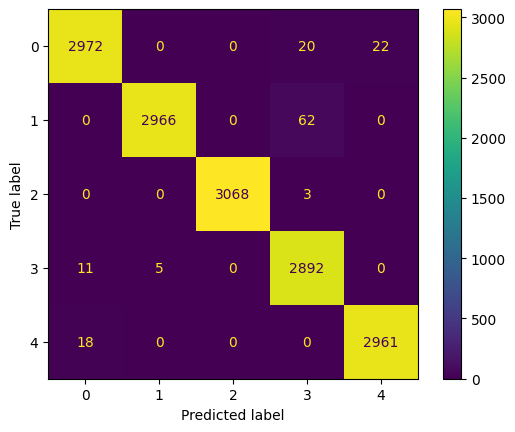

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
c1=confusion_matrix(y_true=y_test,y_pred=pred)
c1
disp = ConfusionMatrixDisplay(confusion_matrix=c1,display_labels=model.classes_)
disp.plot()

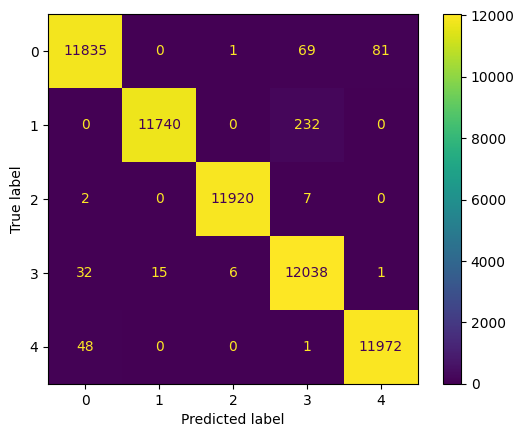

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
c2=confusion_matrix(y_true=y_train,y_pred=t_pred)
c2
disp = ConfusionMatrixDisplay(confusion_matrix=c2,display_labels=model.classes_)
disp.plot()

In [23]:
t_pred=model.predict(X_train)

In [41]:
print(accuracy_score(y_train,t_pred))

0.99175


In [44]:
from sklearn.metrics import classification_report
print("Test Data Classificiaton Report")
print(classification_report(y_test,pred))

Test Data Classificiaton Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3014
           1       1.00      0.98      0.99      3028
           2       1.00      1.00      1.00      3071
           3       0.97      0.99      0.98      2908
           4       0.99      0.99      0.99      2979

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [45]:
print("Train Data Classificiaton Report")
print(classification_report(y_train,t_pred))

Train Data Classificiaton Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11986
           1       1.00      0.98      0.99     11972
           2       1.00      1.00      1.00     11929
           3       0.97      1.00      0.99     12092
           4       0.99      1.00      0.99     12021

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



3